<a href="https://colab.research.google.com/github/nonoumasy/Scrape-Visualiza-Booking-data/blob/master/Scrape_Booking_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install unidecode

In [0]:
import pandas as pd
from datetime import datetime
import unidecode
from geopy.geocoders import Nominatim

new_df.name = new_df.name.apply(unidecode.unidecode)
pd.set_option('display.max_rows', 100)

In [0]:
# load data
df = pd.read_csv('/content/data.csv')

# drop missing values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

# split date column and then combine
temp_df = df.propertyName2.str.split(' – ', expand=True)
new_df = pd.concat([df, temp_df], axis=1)
new_df.drop(['propertyName2'], axis=1, inplace=True)

# rename columns
new_df.columns = ['name', 'price', 'start', 'end']

# rename 'sept' to 'sep'
new_df.start = new_df.start.str.replace('Sept', 'Sep')
new_df.end = new_df.end.str.replace('Sept', 'Sep')

# convert start and end date to datetime objects
for i in range(len(df)):
  new_df['start'][i] = datetime.strptime(new_df.start[i], '%b %d, %Y')
  new_df['end'][i] = datetime.strptime(new_df.end[i], '%b %d, %Y' )

# calculate duration days
new_df['duration'] = new_df.end - new_df.start

# prepare places names for geocoding by removing extra text
new_df.name = new_df.name.str.replace('NEW! ', '')

# geocode places
geolocator = Nominatim(user_agent="asdfdas")
new_df['location'] = new_df.name.apply(geolocator.geocode)

new_df['latitude'] = 0.0
new_df['longitude'] = 0.0

for i, loc in enumerate(new_df.location):
  try:
    new_df['latitude'][i] = loc.latitude
    new_df['longitude'][i] = loc.longitude
  except:
    pass

# remove $ and convert price to numeric
new_df.price = new_df.price.str.replace('$', '')
new_df.price = new_df.price.astype('float')

# drop location column
new_df.drop(['location'], axis=1, inplace=True)

In [189]:
# what was the average stay
new_df.duration.mean()

Timedelta('2 days 16:36:55.384615')

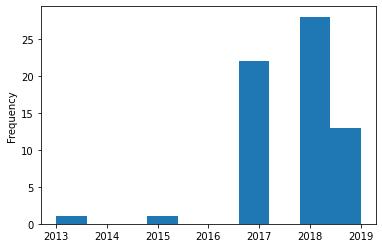

In [195]:
# plot the average stays per year
new_df.start.dt.year.plot(kind='hist')

In [0]:
new_df.to_csv('booking.csv')